In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

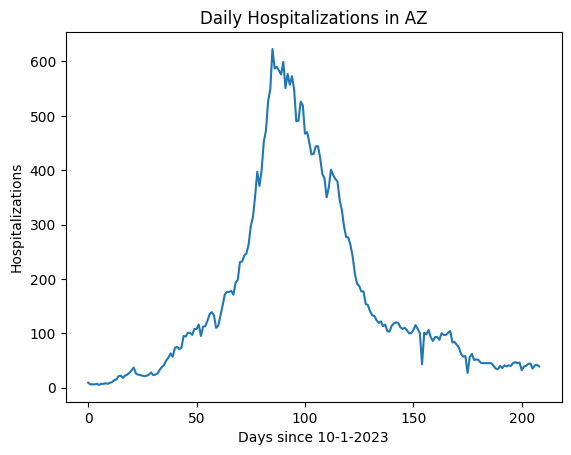

In [7]:

df = pd.read_csv("/Users/averydrennan/Downloads/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")
df = df.sort_values(by='date')
AZ_DATA = [];
AZ_DATA_2223 = [];
state = "AZ"
for i in range(81713):
  if(df.iloc[i]['state'] == state):
    AZ_DATA.append(df.iloc[i]);
for i in range(len(AZ_DATA)):
  d = (datetime.datetime.strptime(AZ_DATA[i]['date'],'%Y/%m/%d'));
  if(d > datetime.datetime(2023,10,1) and d < datetime.datetime(2024,5,15)):
    AZ_DATA_2223.append(AZ_DATA[i]);
hosp = [];
first_day_of_data = 0
#previous_day_admission_influenza_confirmed
#previous_day_admission_adult_covid_confirmed
#total_patients_hospitalized_confirmed_influenza
for i in range(len(AZ_DATA_2223)):
  if(pd.isna(AZ_DATA_2223[i]['total_patients_hospitalized_confirmed_influenza'])):
    hosp.append(0);
  else: 
    hosp.append(int(AZ_DATA_2223[i]['total_patients_hospitalized_confirmed_influenza']));
    if(first_day_of_data == 0): 
      first_day_of_data = i; 
plt.ylabel("Hospitalizations")
plt.xlabel("Days since 10-1-2023")
plt.title("Daily Hospitalizations in "+ state)
plt.plot(hosp);
df2 = pd.DataFrame(hosp);
df2.to_csv(f'../data_sets/{state}_FLU_HOSPITALIZATIONS.csv');